In [1]:
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
df = pd.read_csv("dataset.csv")

df.head()

,x,y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [3]:
x = df[['x']].values
y = df.y.values

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x,y, train_size=.75, random_state=1)

In [5]:
maxdeg = 18

training_error, validation_error = [],[]

for d in range(1, maxdeg+1):
    
    x_poly_train = PolynomialFeatures(degree = d).fit_transform(x_train)

    x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_val)
    
    lreg = LinearRegression(fit_intercept=False)

    lreg.fit(x_poly_train, y_train)
    
    y_train_pred = lreg.predict(x_poly_train)

    y_val_pred = lreg.predict(x_poly_val)
    
    training_error.append(mean_squared_error(y_train, y_train_pred))

    validation_error.append(mean_squared_error(y_val, y_val_pred))
    

In [6]:
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)

print("The best degree of the model is",best_degree)


The best degree of the model is 1


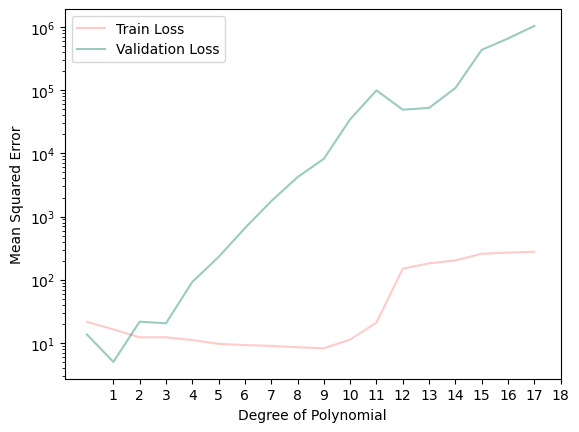

In [7]:
fig, ax = plt.subplots()

ax.plot(training_error, label= 'Train Loss', color='#FF7E79', alpha=0.4)

ax.plot(validation_error, label= 'Validation Loss', color='#007D66', alpha=0.4)

ax.set_xlabel('Degree of Polynomial')
ax.set_xticks(range(1, maxdeg+1))
ax.set_ylabel('Mean Squared Error')
ax.legend(loc = 'best')
ax.set_yscale('log')
plt.show();